
https://github.com/Ajaypal91/Predicting-Price-of-Cryptocurrency

# Bitcoin Price Predictor

# Background

# Hypothesis

### We want to see whether gold or Tesla stock price predicts BTC price?

# Analysis

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
%matplotlib inline
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re


import pandas as pd
import numpy as np
from sklearn import svm
from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score
import matplotlib
import matplotlib.pyplot as plt

import datetime
import sys
import scipy



### Read in Datasets

In [3]:
#Bitcoin and Altcoin Data all from the same Data Set
coin_Aave = pd.read_csv('coin_Aave.csv')
coin_BinanceCoin = pd.read_csv('coin_BinanceCoin.csv')
coin_BinanceCoin = pd.read_csv('coin_BinanceCoin.csv')
coin_Bitcoin = pd.read_csv('coin_Bitcoin.csv')
coin_Cardano = pd.read_csv('coin_Cardano.csv')
coin_ChainLink = pd.read_csv('coin_ChainLink.csv')
coin_Cosmos = pd.read_csv('coin_Cosmos.csv')
coin_CryptocomCoin = pd.read_csv('coin_CryptocomCoin.csv')
coin_Dogecoin = pd.read_csv('coin_Dogecoin.csv')
coin_EOS = pd.read_csv('coin_EOS.csv')
coin_Ethereum = pd.read_csv('coin_Ethereum.csv')
coin_Iota = pd.read_csv('coin_Iota.csv')
coin_Litecoin = pd.read_csv('coin_Litecoin.csv')
coin_Monero = pd.read_csv('coin_Monero.csv')
coin_NEM = pd.read_csv('coin_NEM.csv')
coin_Polkadot = pd.read_csv('coin_Polkadot.csv')
coin_Solana = pd.read_csv('coin_Solana.csv')
coin_Stellar = pd.read_csv('coin_Stellar.csv')
coin_Tether = pd.read_csv('coin_Tether.csv')
coin_Tron = pd.read_csv('coin_Tron.csv')
coin_Uniswap = pd.read_csv('coin_Uniswap.csv')
coin_WrappedBitcoin = pd.read_csv('coin_WrappedBitcoin.csv')
coin_USDCoin = pd.read_csv('coin_USDCoin.csv')
coin_XRP = pd.read_csv('coin_XRP.csv')

#This is a seperate Alt coin,
coin_drgn = pd.read_csv('price_drgn.csv')

#This is Monthly Gold Prices
gold = pd.read_csv('monthly_gold_prices.csv')

# Tesla Stock 
tsla = pd.read_csv("TSLA.csv")
tsla_2020 = pd.read_csv('TSLA-2020.csv')

FileNotFoundError: [Errno 2] File TSLA-2020.csv does not exist: 'TSLA-2020.csv'

### Functions for Data Cleaning and Organizing 

Some of these did not work out for me, but I thought I would keep the code in here in case I find a use for it later. 

In [525]:
# # I did not end up using these....but they may be helpful later

# def convert_date(df,column_date_name,column_price_name):
#     # Convert column with dates to datetime objects
#     df[column_date_name] = pd.to_datetime(df[column_date_name])

#     # Sort values by productId and startDtTime to ensure correct order
#     df.sort_values(by=[column_price_name,column_date_name], inplace=True)

#     # Drop the duplicates
#     df.drop_duplicates([column_price_name], keep='last', inplace=True)
    
#     return df

# coin_Bitcoin = convert_date(coin_Bitcoin,'Date','Close')
# coin_Ethereum = convert_date(coin_Ethereum,'Date','Close')

In [526]:
# # I did not end up using these....but they may be helpful later

# # This turns all the data from daily data into monthly data 
# def day_to_month(df):
#     df.set_index('Date', inplace=True)
#     df.index = pd.to_datetime(df.index)
#     df.sort_index()
#     df.resample('1M').mean()
#     return df

In [527]:
# Attempts to find difference in data both failed

# Method 1 - failed 
#pd.date_range(start = '2015-08-08 23:59:59', end = '2021-02-18 23:59:59' ).difference(coin_Bitcoin.index)


# Method 2 - failed 
#check_df = coin_Bitcoin.reindex(pd.date_range('2015-08-08 23:59:59', '2021-02-18 23:59:59')).isnull().all(1)
#check_df

### Explore the Data

In [528]:
# From the big dataset of altcoins and bitcoin prices
coin_Bitcoin.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [529]:
coin_Ethereum.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07
1,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07
2,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07
3,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07
4,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07


In [20]:
gold.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [530]:
# Check to see if the shapes match
np.shape(coin_Bitcoin)

(2862, 10)

In [531]:
np.shape(coin_Ethereum)

(2031, 10)

In [ ]:
np.shape(gold)

#### They dont match so we have to what dates we can have start and end that both datasets cover

In [532]:
# What date did the bitcoin data begin? What date did the bitcoin data end?
print("Start : " + str(coin_Bitcoin['Date'][0]))
print ("End : " + str(coin_Bitcoin['Date'][len(coin_Bitcoin)-2:-1]))

Start : 2013-04-29 23:59:59
End : 2860    2021-02-26 23:59:59
Name: Date, dtype: object


In [533]:
# What date did the ethereum data start? When does it End?
print("Start : " + str(coin_Ethereum['Date'][0]))
print ("End : " + str(coin_Ethereum['Date'][len(coin_Ethereum)-2:-1]))

Start : 2015-08-08 23:59:59
End : 2029    2021-02-26 23:59:59
Name: Date, dtype: object


#### Find the index of start and end that fits Ethereum Data

In [534]:
# # This is the code WORKED, and helped to find the index of the start and end date that fall on the same data as Ethereum 

# # So, now we need to make Ethereum and Bitcoin Data sets start and end on the same day. 
# # Since ethereum start later we need to find the index of then the bitcoin start on that day and cut the dataset down. 
# coin_Bitcoin['Date'].loc[coin_Bitcoin['Date'] == '2015-08-08 23:59:59']
# coin_Bitcoin['Date'].loc[coin_Bitcoin['Date'] == '2021-02-18 23:59:59']
# # Okay, so the index is 831, ad the end is 2852 lets cut to down to fit.

# BITCOIN

In [18]:
coin_Bitcoin.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [9]:
start_index = 831
end_index = 2852

#This creates a new dataframs of just the date and closing price of bitcoin
coin_Bitcoin_Update = coin_Bitcoin[['Date','Close']].copy()
# This matches the start and end dates of the ethereum data set
coin_Bitcoin_Update = coin_Bitcoin_Update[start_index:end_index]

coin_Bitcoin_Update

,Date,Close
831,2015-08-08 23:59:59,260.997009
832,2015-08-09 23:59:59,265.083008
833,2015-08-10 23:59:59,264.470001
834,2015-08-11 23:59:59,270.385986
835,2015-08-12 23:59:59,266.376007
...,...,...
2847,2021-02-13 23:59:59,47105.517473
2848,2021-02-14 23:59:59,48717.290211
2849,2021-02-15 23:59:59,47945.056832
2850,2021-02-16 23:59:59,49199.871344


In [19]:
# Here we are updatting the "Date" column data to be datetime
coin_Bitcoin_Update.set_index('Date', inplace=True)

# Then set the index to the data
coin_Bitcoin_Update.index = pd.to_datetime(coin_Bitcoin_Update.index)

# Make sure its sorted
coin_Bitcoin_Update.sort_index()

# This will take the mean of the data within one month and set it
coin_Bitcoin_Update = coin_Bitcoin_Update.resample('1M').mean()
coin_Bitcoin_Update

# Indexing Bitcoin dataset
    # matbe move this one up to where the dataset for bitcoin is
coin_Bitcoin_Update= coin_Bitcoin_Update[:60]

# Resetting the index
coin_Bitcoin_Update.reset_index(inplace= True)
coin_Bitcoin_Update.shape
coin_Bitcoin_Update

,Date,Close
0,2015-08-31,241.751832
1,2015-09-30,233.595533
2,2015-10-31,264.855356
3,2015-11-30,348.883332
4,2015-12-31,424.464547
5,2016-01-31,410.844485
6,2016-02-29,404.408274
7,2016-03-31,416.525774
8,2016-04-30,434.339398
9,2016-05-31,461.954415


# ETHEREUM

In [537]:
coin_Ethereum.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Ethereum,ETH,2015-08-08 23:59:59,2.798810,0.714725,2.793760,0.753325,674188.0,4.548689e+07
1,2,Ethereum,ETH,2015-08-09 23:59:59,0.879810,0.629191,0.706136,0.701897,532170.0,4.239957e+07
2,3,Ethereum,ETH,2015-08-10 23:59:59,0.729854,0.636546,0.713989,0.708448,405283.0,4.281836e+07
3,4,Ethereum,ETH,2015-08-11 23:59:59,1.131410,0.663235,0.708087,1.067860,1463100.0,6.456929e+07
4,5,Ethereum,ETH,2015-08-12 23:59:59,1.289940,0.883608,1.058750,1.217440,2150620.0,7.364501e+07


In [26]:
## Reorganizing the datatset
coin_Ethereum_Update = coin_Ethereum[['Date','Close']].copy()

# Here we are updatting the "Date" column data to be datetime
coin_Ethereum_Update.set_index('Date', inplace=True)

# Then set the index to the dat
coin_Ethereum_Update.index = pd.to_datetime(coin_Ethereum_Update.index)

# Make sure its sorted
coin_Ethereum_Update.sort_index()

# This will take the mean of the data within one month and set it
coin_Ethereum_Update = coin_Ethereum_Update.resample('1M').mean()
coin_Ethereum_Update.reset_index(inplace= True)

#Indexing the data set
coin_Ethereum_Update= coin_Ethereum_Update[:60]

coin_Ethereum_Update

,Date,Close
0,2015-08-31,1.259649
1,2015-09-30,0.988966
2,2015-10-31,0.661104
3,2015-11-30,0.931352
4,2015-12-31,0.886259
5,2016-01-31,1.494696
6,2016-02-29,4.545909
7,2016-03-31,11.174799
8,2016-04-30,8.943613
9,2016-05-31,11.364836


#### The datasets FIT!!!
Awesome, so now the ethereum and bitcon data start and end at the same time, and have the same number of row data because we took the mean of the month data. That way even if there are missing day values that have been average out in the month value. 

In [539]:
np.shape(coin_Ethereum_Update)

(67, 1)

In [540]:
np.shape(coin_Bitcoin_Update)

(67, 1)

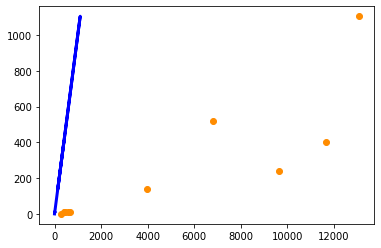

In [541]:
#This code was taken directly from 
# https://github.com/Ajaypal91/Predicting-Price-of-Cryptocurrency/blob/master/Models/linear_regression.py

msk = np.random.rand(len(coin_Bitcoin_Update)) < 0.8

X = coin_Bitcoin_Update["Close"]
Y = coin_Ethereum_Update["Close"]

X_train = np.array(X[msk]).reshape(len(X[msk]),1)
X_test = np.array(X[~msk]).reshape(len(X[~msk]),1)
Y_train = np.array(Y[msk]).reshape(len(X[msk]),1)
Y_test = np.array(Y[~msk]).reshape(len(X[~msk]),1)

clf = linear_model.LinearRegression()
clf.fit(X_train,Y_train)
predicted_vals = clf.predict(X_test)

plt.scatter(X_test, Y_test, color='darkorange', label='data')
plt.plot(Y_test, Y_test, color='blue', linewidth=3)
plt.show()

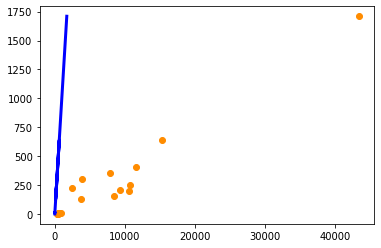

In [542]:

msk = np.random.rand(len(coin_Bitcoin_Update)) < 0.7

X = coin_Bitcoin_Update["Close"]
Y = coin_Ethereum_Update["Close"]

X_train = np.array(X[msk]).reshape(len(X[msk]),1)
X_test = np.array(X[~msk]).reshape(len(X[~msk]),1)
Y_train = np.array(Y[msk]).reshape(len(X[msk]),1)
Y_test = np.array(Y[~msk]).reshape(len(X[~msk]),1)

clf = linear_model.LinearRegression()
clf.fit(X_train,Y_train)
predicted_vals = clf.predict(X_test)

plt.scatter(X_test, Y_test, color='darkorange', label='data')
plt.plot(Y_test, Y_test, color='blue', linewidth=3)
plt.show()

In [543]:
Well, these dont show anything thats very interesting.

SyntaxError: invalid syntax (<ipython-input-543-b7b722d51f40>, line 1)

# GOLD

### Gold Price Prediction
https://github.com/pitagorinaunuka/Gold-Price-Prediction

If we wanted to look at gold versus bitcoin, I need to first fit the data together. The date for gold started in the year 1950, and is monthly data. So we need to make the dates based on months for bitcoin, and then only look at the gold prices during the same years as bitcoin. 

In [5]:
# Gold Price History 
gold

,Date,Price
0,1950-01,34.730
1,1950-02,34.730
2,1950-03,34.730
3,1950-04,34.730
4,1950-05,34.730
...,...,...
842,2020-03,1593.764
843,2020-04,1680.030
844,2020-05,1715.697
845,2020-06,1734.032


In [17]:
## Reorganizing the dataset
gold_update = gold[['Date','Price']].copy()

# Here we are updatting the "Date" column data to be datetime
gold_update.set_index('Date', inplace=True)

# Then set the index to the dat
gold_update.index = pd.to_datetime(gold_update.index)

# Make sure its sorted
gold_update.sort_index()

# This will take the mean of the data within one month and set it
gold_update = gold_update.resample('1M').mean()

# Indexing the dataset
gold_update= gold_update[787:847]

# Resetting the index
gold_update.reset_index(inplace= True)
gold_update

,Date,Price
0,2015-08-31,1117.525
1,2015-09-30,1124.905
2,2015-10-31,1157.123
3,2015-11-30,1088.388
4,2015-12-31,1068.317
5,2016-01-31,1095.655
6,2016-02-29,1194.893
7,2016-03-31,1246.312
8,2016-04-30,1241.452
9,2016-05-31,1259.755


### Comparing Original Data with Train Set

In [16]:
# Comparision, Training Set Matches
mean_gold_data = gold_update['Price'].mean()
mean_gold_train = gold_train.mean()

mean_Bitcoin_data = coin_Bitcoin_Update['Close'].mean()
mean_Bitcoin_train = coin_Bitcoin_Update_train.mean()

print('Mean of Original Gold Data: ' + str(mean_gold_data))
print('Mean of Gold Train Data: ' + str(mean_gold_train))
print('Mean of Original Bitcoin Data: ' + str(mean_Bitcoin_data))
print('Mean of Bitcoin Train Data: ' + str(mean_Bitcoin_train))

Mean of Original Gold Data: 1321.6909833333334
Mean of Gold Train Data: 1342.9368541666665
Mean of Original Bitcoin Data: 4933.246067739443
Mean of Bitcoin Train Data: 4987.206804545831


In [ ]:
# This is an Alt Coin that I was interested in seeing (it was not in the big dataset)
coin_drgn

In [ ]:
# Making the datafram only the column data I am interested in
coin_drgn = coin_drgn[['date', 'CapMrktCurUSD', 'PriceUSD']].copy()
coin_drgn = coin_drgn.dropna()
coin_drgn

In [ ]:
# This is the TSLA dataset prices
tsla.head()

In [ ]:
tsla = tsla[['Date', 'Close', 'Volume']].copy()
tsla.dropna()
tsla.head()

In [ ]:
convert_date(coin_drgn,'date','PriceUSD')
coin_drgn.plot(x='date', y='PriceUSD', style='o')
coin_Bitcoin.plot(x="Date",y = "Close", style = '-')


In [ ]:
coin_drgn['date'].sort_values(ascending = True)

In [ ]:
plt.plot(coin_drgn['date'],coin_drgn['PriceUSD'], label = "Drgn")
plt.plot(coin_Bitcoin['Date'], coin_Bitcoin['Close'], label = "Bitcoin")
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('Two or more lines on same plot with suitable legends ')
plt.legend()
plt.show()

In [ ]:
coin_drgn

## TESLA EDA

In [544]:
# Creating data set of first TSLA set
# Change dataset from daily to monthly.
tsla.set_index('Date', inplace=True)
tsla.index = pd.to_datetime(tsla.index)
tsla = tsla.sort_index()
tsla = tsla.resample('1M').mean()
tsla = tsla[62:122]
tsla.reset_index(inplace=True)

# Put data into desired shape.
#start = tsla[tsla['Date'] == '2015-08-31'].index
#end = tsla[tsla['Date'] == '2020-12-31'].index
tsla.head()
#print(start)
#print(end)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-31,243.783332,249.409999,238.736189,244.550475,244.550475,5.488767e+06
1,2015-09-30,253.346667,256.621430,248.981904,252.906191,252.906191,3.823243e+06
2,2015-10-31,223.111363,226.273182,217.824090,221.982728,221.982728,4.582364e+06
3,2015-11-30,220.641000,224.008501,217.090501,220.882001,220.882001,3.924420e+06
4,2015-12-31,230.100456,233.620910,226.829090,230.171819,230.171819,2.720250e+06


In [545]:
# Creating data set of second TSLA set
tsla_2020.set_index('Date', inplace=True)
tsla_2020.index = pd.to_datetime(tsla_2020.index)
tsla_2020 = tsla_2020.sort_index()
tsla_2020 = tsla_2020.resample('1M').mean()
tsla_2020.reset_index(inplace=True)
tsla_2020 = tsla_2020[:5]
tsla_2020

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-03-31,93.857667,99.311335,89.384166,93.980834,93.980834,1.036881e+08
1,2020-04-30,133.058952,137.320381,128.212762,132.719715,132.719715,9.084819e+07
2,2020-05-31,159.812000,163.147200,156.069100,159.885102,159.885102,6.820688e+07
3,2020-06-30,191.638728,196.173181,187.734000,192.708453,192.708453,5.813016e+07
4,2020-07-31,292.988002,303.024820,281.311821,292.028179,292.028179,8.607327e+07


In [23]:
# Combining the two datsets together
tsla = pd.concat([tsla, tsla_2020], ignore_index = True) 
tsla.shape

NameError: name 'tsla_2020' is not defined

In [22]:
# Here we are updatting the "Date" column data to be datetime
tsla = tsla(['Date'], ['Close'])
Tesla

#I cant do indexing because I do not have the data sets (Pain)

TypeError: 'DataFrame' object is not callable

# MODEL 1: GOLD and BITCOIN

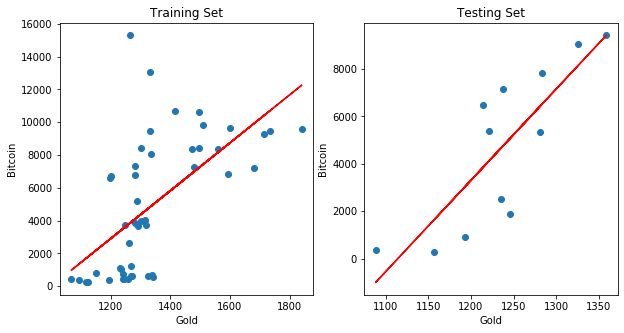

In [27]:
#Split the data
gold_train, gold_test, coin_Bitcoin_Update_train, coin_Bitcoin_Update_test = train_test_split(gold_update['Price'],
                                                                                             coin_Bitcoin_Update['Close'],
                                                                                             test_size= 0.20, random_state= 10)
# default qay to split
#gold_train = gold_update['Price'][:48]
#gold_test= gold_update['Price'][48:]
#Bitcoin_train= coin_Bitcoin_Update['Close'][:48]
#Bitcoin_test = coin_Bitcoin_Update['Close'][48:]

# Plot the data
fig, (ax1, ax2)= plt.subplots(1, 2, figsize= (10, 5))


# Plot the data
ax1.plot(gold_train, coin_Bitcoin_Update_train, 'o')
ax2.plot(gold_test, coin_Bitcoin_Update_test, 'o')

# Plot the regression line
m, b= np.polyfit(gold_train, coin_Bitcoin_Update_train, 1)
m2, b2= np.polyfit(gold_test, coin_Bitcoin_Update_test, 1)


# Plot the regression line
ax1.plot(gold_train, m*(gold_train) + b, color= 'red')
ax2.plot(gold_test, m2*(gold_test) + b2, color= 'red')

# Labeling the graph
ax1.set_xlabel('Gold')
ax1.set_ylabel('Bitcoin')
ax1.set_title('Training Set')
ax2.set_xlabel('Gold')
ax2.set_ylabel('Bitcoin')
ax2.set_title('Testing Set')

plt.show() # This lets you plot multiple inputs on the same graph

### Comparing Original and Training Set

In [28]:
# Comparision, Training Set Matches
mean_gold_data = gold_update['Price'].mean()
mean_gold_train = gold_train.mean()

mean_Bitcoin_data = coin_Bitcoin_Update['Close'].mean()
mean_Bitcoin_train = coin_Bitcoin_Update_train.mean()

print('Mean of Original Gold Data: ' + str(mean_gold_data))
print('Mean of Gold Train Data: ' + str(mean_gold_train))
print('Mean of Original Bitcoin Data: ' + str(mean_Bitcoin_data))
print('Mean of Bitcoin Train Data: ' + str(mean_Bitcoin_train))

Mean of Original Gold Data: 1321.6909833333334
Mean of Gold Train Data: 1342.9368541666665
Mean of Original Bitcoin Data: 4933.246067739443
Mean of Bitcoin Train Data: 4987.206804545831


# MODEL 2: ETHEREUM AND BITCOIN

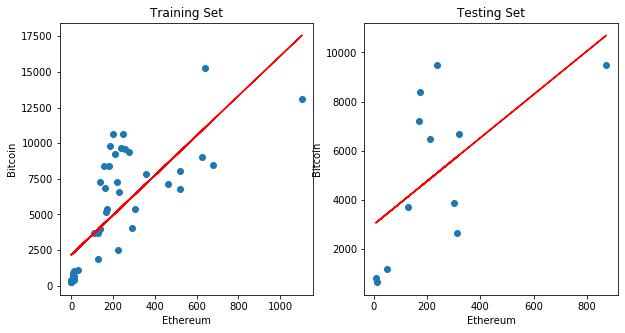

In [40]:
#split the data
ethereum_train, ethereum_test, coin_Bitcoin_Update_train2, coin_Bitcoin_Update_test2 = train_test_split(coin_Ethereum_Update['Close'],
                                                                                             coin_Bitcoin_Update['Close'],
                                                                                             test_size= 0.20, random_state= 15)

# Plot the data
fig, (ax3, ax4)= plt.subplots(1, 2, figsize= (10, 5))


# Plot the data
ax3.plot(ethereum_train, coin_Bitcoin_Update_train2, 'o')
ax4.plot(ethereum_test, coin_Bitcoin_Update_test2, 'o')

# Plot the regression line
m3, b3= np.polyfit(ethereum_train, coin_Bitcoin_Update_train2, 1)
m4, b4= np.polyfit(ethereum_test, coin_Bitcoin_Update_test2, 1)


# Plot the regression line
ax3.plot(ethereum_train, m3*(ethereum_train) + b3, color= 'red')
ax4.plot(ethereum_test, m4*(ethereum_test) + b4, color= 'red')

# Labeling the graph
ax3.set_xlabel('Ethereum')
ax3.set_ylabel('Bitcoin')
ax3.set_title('Training Set')
ax4.set_xlabel('Ethereum')
ax4.set_ylabel('Bitcoin')
ax4.set_title('Testing Set')

plt.show() # This lets you plot multiple inputs on the same graph

### Comparing Original and Training Set

In [41]:
# Comparision, Training Set Matches
mean_ethereum_data = coin_Ethereum_Update['Close'].mean()
mean_ethereum_train = ethereum_train.mean()

mean_Bitcoin_data = coin_Bitcoin_Update['Close'].mean()
mean_Bitcoin_train = coin_Bitcoin_Update_train2.mean()

print('Mean of Original Ethereum Data: ' + str(mean_ethereum_data))
print('Mean of Ethereum Train Data: ' + str(mean_ethereum_train))
print('Mean of Original Bitcoin Data: ' + str(mean_Bitcoin_data))
print('Mean of Bitcoin Train Data: ' + str(mean_Bitcoin_train))

Mean of Original Ethereum Data: 203.7693348235417
Mean of Ethereum Train Data: 196.36458018405213
Mean of Original Bitcoin Data: 4933.246067739443
Mean of Bitcoin Train Data: 4903.192408915919


# MODEL 3: TSLA and BITCOIN

In [ ]:
#split the data
tsla_train, tsla_test, coin_Bitcoin_Update_train3, coin_Bitcoin_Update_test3 = train_test_split(tsla['Close'],
                                                                                             coin_Bitcoin_Update['Close'],
                                                                                             test_size= 0.20, random_state= 20)

# Plot the data
fig, (ax5, ax6)= plt.subplots(1, 2, figsize= (10, 5))


# Plot the data
ax5.plot(tsla_train, coin_Bitcoin_Update_train3, 'o')
ax6.plot(tsla_test, coin_Bitcoin_Update_test3, 'o')

# Plot the regression line
m4, b4= np.polyfit(tsla_train, coin_Bitcoin_Update_train3, 1)
m5, b5= np.polyfit(tsla_test, coin_Bitcoin_Update_test3, 1)


# Plot the regression line
ax5.plot(tsla_train, m4*(tsla_train) + b3, color= 'red')
ax6.plot(tsla_test, m5*(tsla_test) + b4, color= 'red')

# Labeling the graph
ax5.set_xlabel('Ethereum')
ax5.set_ylabel('Bitcoin')
ax5.set_title('Training Set')
ax6.set_xlabel('Ethereum')
ax6.set_ylabel('Bitcoin')
ax6.set_title('Testing Set')

plt.show() # This lets you plot multiple inputs on the same graph

### Comparing Original and Training Set

In [ ]:
# Comparision, Training Set Matches
mean_tsla_data = tsla['Close'].mean()
mean_tsla_train = tsla_train.mean()

mean_Bitcoin_data = coin_Bitcoin_Update['Close'].mean()
mean_Bitcoin_train = coin_Bitcoin_Update_train2.mean()

print('Mean of Original TSLA Data: ' + str(mean_tsla_data))
print('Mean of TSLA Train Data: ' + str(mean_tsla_train))
print('Mean of Original Bitcoin Data: ' + str(mean_Bitcoin_data))
print('Mean of Bitcoin Train Data: ' + str(mean_Bitcoin_train))